In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12,8)

# Load labels and trying to understand them

In [3]:
labels_folder = 'data/labels/'

with open(labels_folder + 'SAB-AudioTagging-2020.json') as f:
  labels_20 = json.load(f)
with open(labels_folder + 'SAB-AudioTagging-2021.json') as f:
  labels_21 = json.load(f)

In [4]:
type(labels_20), type(labels_20), len(labels_20), len(labels_21)

(list, list, 324, 237)

In [5]:
def print_json_structure(data, indent=0):
    if isinstance(data, dict):
        for key, value in data.items():
            print(" " * indent + f"--- {key}")
            print_json_structure(value, indent + 4)
    elif isinstance(data, list):
        for item in data:
            print_json_structure(item, indent)
    else:
        print(" " * indent + f"{type(data)} : {data}")

print_json_structure(labels_20[0])

--- assigned_user
    --- id
        <class 'int'> : 8
    --- role
        <class 'str'> : admin
    --- username
        <class 'str'> : admin-SAB
--- created_at
    <class 'str'> : Wed, 20 Jan 2021 12:24:22 GMT
--- filename
    <class 'str'> : a03f4e66fc4340718a0c2b78be736e31.wav
--- is_marked_for_review
    <class 'bool'> : True
--- last_modified
    <class 'str'> : Wed, 20 Jan 2021 12:24:22 GMT
--- original_filename
    <class 'str'> : fu_2jeb5yktarbeiyk.wav
--- reference_transcription
    <class 'str'> : 
--- segmentations
    --- annotations
        --- Distance
            --- id
                <class 'int'> : 47
            --- values
                --- id
                    <class 'int'> : 37
                --- value
                    <class 'str'> : Foreground
        --- Element
            --- id
                <class 'int'> : 46
            --- values
                --- id
                    <class 'int'> : 48
                --- value
                    <class 

In [6]:
set([k for el in labels_20 for k in el.keys()])

{'assigned_user',
 'created_at',
 'filename',
 'is_marked_for_review',
 'last_modified',
 'original_filename',
 'reference_transcription',
 'segmentations',
 'url'}

I guess the labels are in the 'segmentations' field, which is a list of 'annotations'

'annotations' has two fields, 'Distance' and 'Element'

'Element' is self-explanatory (I guess), 'Distance' Idk what is

In [7]:
labels_20[0]['segmentations'][0]['annotations']

{'Distance': {'id': 47, 'values': [{'id': 37, 'value': 'Foreground'}]},
 'Element': {'id': 46, 'values': [{'id': 48, 'value': 'Nature/Animals/Bird'}]}}

In [8]:
set([len(seg['annotations']['Element']['values']) for el in labels_20 for seg in el['segmentations']])

{1}

In [9]:
set([len(seg['annotations']['Distance']['values']) for el in labels_20 for seg in el['segmentations'] if 'Distance' in seg['annotations'].keys()])

{1}

In [10]:
set([len(seg['annotations']['Element']['values']) for el in labels_21 for seg in el['segmentations']])

{1}

In [11]:
set([len(seg['annotations']['Distance']['values']) for el in labels_21 for seg in el['segmentations'] if 'Distance' in seg['annotations'].keys()])

{1}

So, Elements and Distances have a list of values that is always of length 1. I guess that ids and values in the list of values of Elements and Distances are the labels values and ids. I still don't understand why an Element and a Distance should have its own id.

Let's try to compute the possible labels with their respective ids and counts, let's use only the Element field

In [12]:
list_labels_20 = []
for obj in labels_20:
    for seg in obj['segmentations']:
        id = seg['annotations']['Element']['values'][0]['id']  # I know it's a 1-length list
        lab = seg['annotations']['Element']['values'][0]['value']
        list_labels_20.append((lab, id))

lab_counts_20 = {}
for el in list_labels_20:
    if el not in lab_counts_20.keys():
        lab_counts_20[el] = 0
    lab_counts_20[el] += 1

lab_counts_20

{('Nature/Animals/Bird', 48): 226,
 ('Transport/Motorized/Road', 64): 151,
 ('Human/Voice', 38): 176,
 ('Things/Trolley', 54): 1,
 ('Nature/Elements/Wind', 43): 119,
 ('Industrial/Construction', 50): 29,
 ('Nothing', 67): 10,
 ('Nature/Animals/Dog', 47): 61,
 ('Things/Movement', 65): 37,
 ('Signals/Bells', 56): 10,
 ('Human/Movement', 39): 14,
 ('Industrial/Ventilation', 51): 11,
 ('Human/Music', 40): 11,
 ('Nature/Animals', 46): 4,
 ('Transport/Motorized', 60): 2,
 ('Industrial/Industry', 52): 4,
 ('Nature/Elements/Water', 44): 5,
 ('Signals/Siren', 57): 2,
 ('Nature/Animals/Cat', 66): 1,
 ('Signals/Klaxon', 70): 1,
 ('Things/Door', 53): 14,
 ('Human/Movement/Steps', 41): 6,
 ('Nature/Elements/Thunder', 45): 3,
 ('Signals/Alarm', 58): 2,
 ('Transport/Motorized/Air', 61): 2,
 ('Things/Blind', 55): 2,
 ('Nature/Animals/Cricket', 69): 1,
 ('Noise', 68): 1}

In [13]:
list_labels_21 = []
for obj in labels_21:
    for seg in obj['segmentations']:
        id = seg['annotations']['Element']['values'][0]['id']  # I know it's a 1-length list
        lab = seg['annotations']['Element']['values'][0]['value']
        list_labels_21.append((lab, id))

lab_counts_21 = {}
for el in list_labels_21:
    if el not in lab_counts_21.keys():
        lab_counts_21[el] = 0
    lab_counts_21[el] += 1

lab_counts_21

{('Human/Voice', 5): 228,
 ('Human/Movement/Steps', 8): 11,
 ('Things/Movement', 23): 318,
 ('Industrial/Construction', 9): 16,
 ('Transport/Motorized/Road', 34): 198,
 ('Nature/Animals/Bird', 15): 321,
 ('Nature/Elements/Wind', 19): 192,
 ('Nature/Animals/Dog', 14): 87,
 ('Signals/Klaxon', 28): 17,
 ('Human/Movement', 7): 32,
 ('Signals', 36): 8,
 ('Things/Door', 22): 8,
 ('Industrial/Ventilation', 11): 11,
 ('Transport/Motorized/Rail', 33): 12,
 ('Signals/Bells', 25): 28,
 ('Human/Music', 6): 14,
 ('Signals/Alarm', 27): 12,
 ('Transport/Non-motorized', 29): 4,
 ('Nature/Elements/Water', 20): 22,
 ('Industrial/Industry', 10): 6,
 ('Things/Ball', 40): 9,
 ('Nothing', 3): 1,
 ('Human/Cough', 37): 6,
 ('Transport/Motorized/Air', 31): 1,
 ('Nature/Vegetation', 12): 1,
 ('Industrial/Vacuum', 39): 1,
 ('Things/Trolley', 38): 1,
 ('Nature/Animals/Cat', 16): 1,
 ('Nature/Animals/Sheep', 35): 5,
 ('Transport/Motorized', 30): 3,
 ('Signals/Siren', 26): 3}

In [14]:
tot_possible_labels = set(lab_counts_20.keys()).union(set(lab_counts_21.keys()))
len(lab_counts_20), len(lab_counts_21), len(tot_possible_labels)

(28, 31, 59)

In [15]:
sorted(list(tot_possible_labels))

[('Human/Cough', 37),
 ('Human/Movement', 7),
 ('Human/Movement', 39),
 ('Human/Movement/Steps', 8),
 ('Human/Movement/Steps', 41),
 ('Human/Music', 6),
 ('Human/Music', 40),
 ('Human/Voice', 5),
 ('Human/Voice', 38),
 ('Industrial/Construction', 9),
 ('Industrial/Construction', 50),
 ('Industrial/Industry', 10),
 ('Industrial/Industry', 52),
 ('Industrial/Vacuum', 39),
 ('Industrial/Ventilation', 11),
 ('Industrial/Ventilation', 51),
 ('Nature/Animals', 46),
 ('Nature/Animals/Bird', 15),
 ('Nature/Animals/Bird', 48),
 ('Nature/Animals/Cat', 16),
 ('Nature/Animals/Cat', 66),
 ('Nature/Animals/Cricket', 69),
 ('Nature/Animals/Dog', 14),
 ('Nature/Animals/Dog', 47),
 ('Nature/Animals/Sheep', 35),
 ('Nature/Elements/Thunder', 45),
 ('Nature/Elements/Water', 20),
 ('Nature/Elements/Water', 44),
 ('Nature/Elements/Wind', 19),
 ('Nature/Elements/Wind', 43),
 ('Nature/Vegetation', 12),
 ('Noise', 68),
 ('Nothing', 3),
 ('Nothing', 67),
 ('Signals', 36),
 ('Signals/Alarm', 27),
 ('Signals/Alar

I don't know why ids are different

In [16]:
possible_labels_no_id = set([el for el, _ in lab_counts_20.keys()]).union(set([el for el, _ in lab_counts_21.keys()]))
len(possible_labels_no_id)

36

In [17]:
sorted(list(possible_labels_no_id))

['Human/Cough',
 'Human/Movement',
 'Human/Movement/Steps',
 'Human/Music',
 'Human/Voice',
 'Industrial/Construction',
 'Industrial/Industry',
 'Industrial/Vacuum',
 'Industrial/Ventilation',
 'Nature/Animals',
 'Nature/Animals/Bird',
 'Nature/Animals/Cat',
 'Nature/Animals/Cricket',
 'Nature/Animals/Dog',
 'Nature/Animals/Sheep',
 'Nature/Elements/Thunder',
 'Nature/Elements/Water',
 'Nature/Elements/Wind',
 'Nature/Vegetation',
 'Noise',
 'Nothing',
 'Signals',
 'Signals/Alarm',
 'Signals/Bells',
 'Signals/Klaxon',
 'Signals/Siren',
 'Things/Ball',
 'Things/Blind',
 'Things/Door',
 'Things/Movement',
 'Things/Trolley',
 'Transport/Motorized',
 'Transport/Motorized/Air',
 'Transport/Motorized/Rail',
 'Transport/Motorized/Road',
 'Transport/Non-motorized']

Since Idk what ids represent, I'll remove them

In [18]:
lab_counts_20 = {l:count for (l, _), count in lab_counts_20.items()}
lab_counts_21 = {l:count for (l, _), count in lab_counts_21.items()}

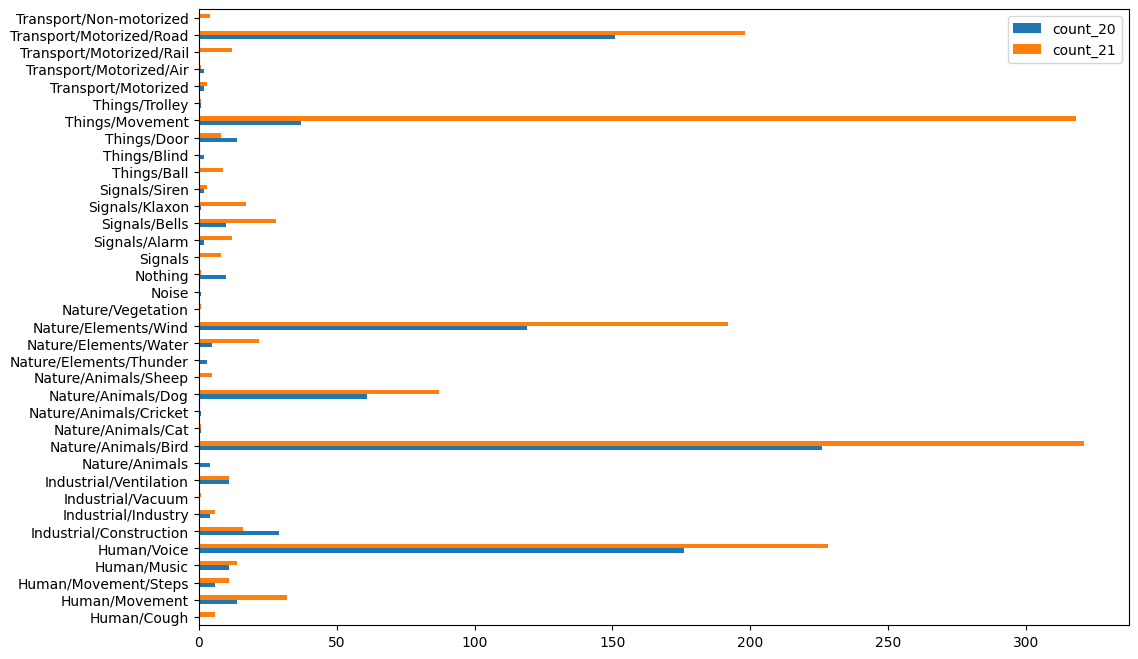

In [19]:
count_20 = [lab_counts_20.get(l, 0) for l in sorted(list(possible_labels_no_id))]
count_21 = [lab_counts_21.get(l, 0) for l in sorted(list(possible_labels_no_id))]

df_to_plot = pd.DataFrame({'count_20': count_20, 'count_21': count_21}, index=sorted(list(possible_labels_no_id)))

df_to_plot.plot.barh()
plt.show()

Let's plot the number of annotations for each element in the json lists

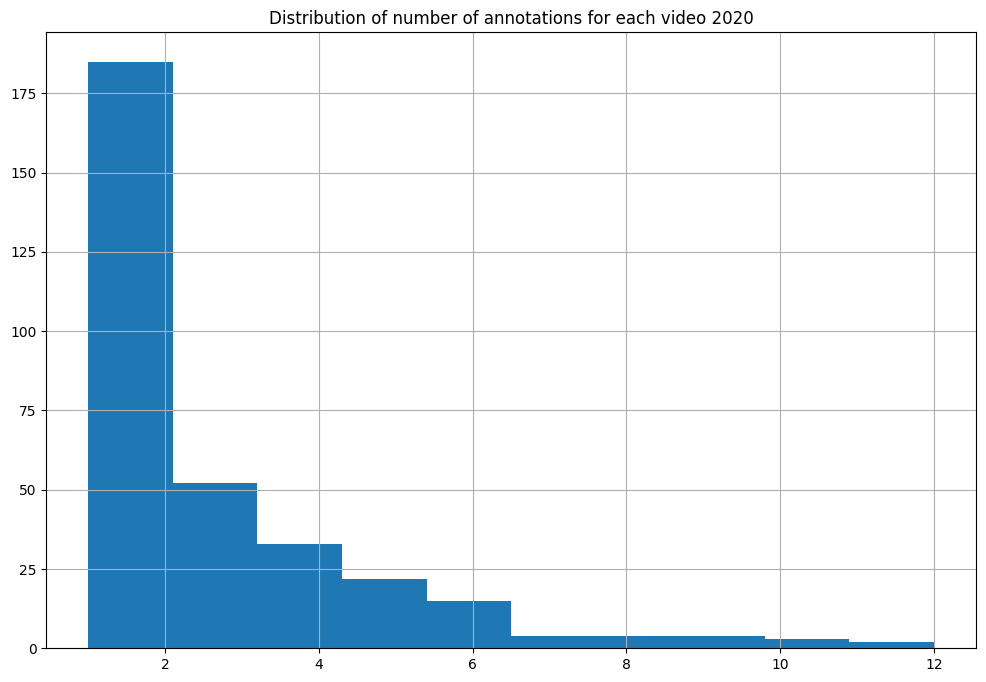

1     101
2      84
3      52
4      33
5      22
6      15
8       4
7       4
9       4
10      3
11      1
12      1
Name: n, dtype: int64


In [20]:
n_annot = pd.Series([len(obj['segmentations']) for obj in labels_20], name='n')
n_annot.hist()
plt.title('Distribution of number of annotations for each video 2020')
plt.show()
print(n_annot.value_counts())

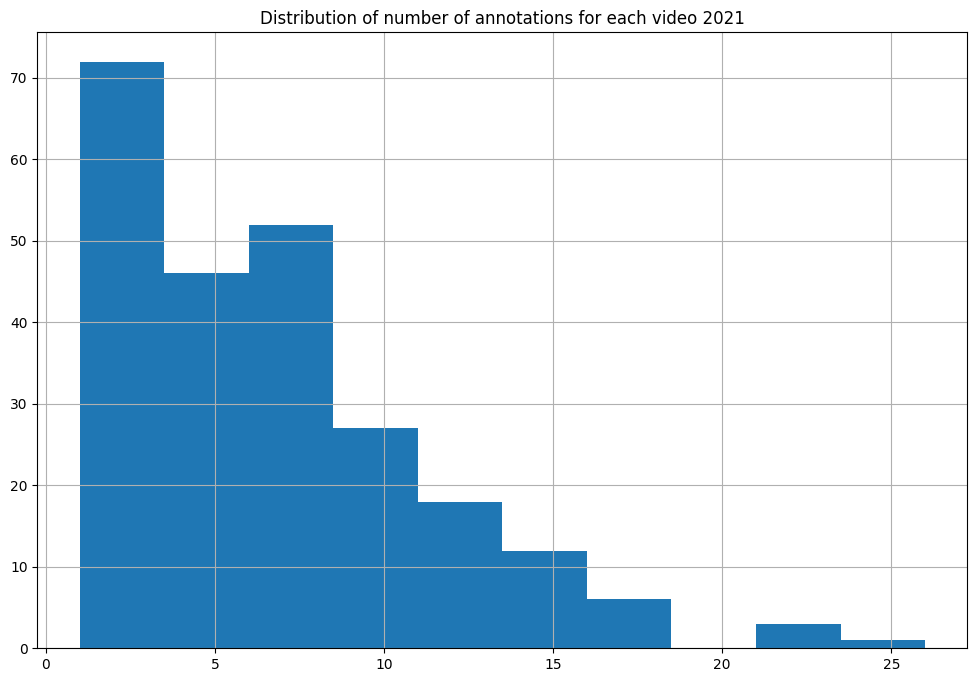

3     32
2     29
5     24
4     22
8     20
6     20
10    14
9     13
7     12
1     11
11     7
12     6
15     6
14     6
13     5
18     3
16     2
26     1
17     1
22     1
21     1
23     1
Name: n, dtype: int64


In [21]:
n_annot = pd.Series([len(obj['segmentations']) for obj in labels_21], name='n')
n_annot.hist()
plt.title('Distribution of number of annotations for each video 2021')
plt.show()
print(n_annot.value_counts())

# Check labels - audio files correspondance

In [26]:
labels_names_20 = set([el['original_filename'] for el in labels_20])
labels_names_21 = set([el['original_filename'] for el in labels_21])
len(labels_names_20), len(labels_names_21)

(324, 237)

In [27]:
audios_20_folder = 'data/audios/audio_2020'
audios_21_folder = 'data/audios/audio_2021'

audios_20 = set([el for el in os.listdir(audios_20_folder)])
audios_21 = set([el for el in os.listdir(audios_21_folder)])
len(audios_20), len(audios_21)

(263, 237)

In [28]:
len(audios_20.intersection(labels_names_20)), len(audios_21.intersection(labels_names_21))

(259, 237)

In [30]:
audios_20.difference(labels_names_20)

{'WhatsApp Video 2020-05-27 at 15.14.29.wav',
 'WhatsApp Video 2020-05-27 at 19.49.14.wav',
 'WhatsApp Video 2020-05-29 at 09.33.12.wav',
 'WhatsApp Video 2020-05-29 at 22.20.50.wav'}

In [33]:
labels_names_20.difference(audios_20)

{'e03a2a6f-4125-4673-9f6f-fa89586b6b49.wav',
 'e16784e9-b948-4363-a267-90c8fbecc363.wav',
 'e9ad192a-746e-4b35-8af6-f7692afe9165.wav',
 'ed783b51-0d74-4c1e-ad00-226dc8387725.wav',
 'f2d809a4-2641-4a46-9b22-cdf300540d7a.wav',
 'f3be0fa4-2172-4359-919b-fba7aa5244c3.wav',
 'fa6b8573-3e51-44d0-96d0-d2a872eaafec.wav',
 'ffbb755c-9c80-44a0-bc38-61fb746cd8b3.wav',
 'fu_23awawrna4u87yq.wav',
 'fu_3p9kzij8j4b6c7i.wav',
 'fu_43idyr5v3srk6y4.wav',
 'fu_46mqqgn8rzqbc4n.wav',
 'fu_4dbb8i5siwtfcy2.wav',
 'fu_4djyn29r2aysvbh.wav',
 'fu_5pnbaprtzzsmewa.wav',
 'fu_5uvf22jp8wrd9m2.wav',
 'fu_6vky5hkhi3iv3c2.wav',
 'fu_7a677fn7ds4whe9.wav',
 'fu_7c9raw2zwnqmfdc.wav',
 'fu_7jkj7jpqiyxjpri.wav',
 'fu_83ehrdjks8h6x2t.wav',
 'fu_86fqwfqvxwqz8kk.wav',
 'fu_8u93363a59y4qgz.wav',
 'fu_axejfsqbhh8w5ic.wav',
 'fu_b26usfjbib8qxh7.wav',
 'fu_c6q7y6hxpknhy4j.wav',
 'fu_crjvrqf72sj36fq.wav',
 'fu_czi9k7ds6d63nxz.wav',
 'fu_e2b8fang97zd4j7.wav',
 'fu_e5uvy2pxvqe47vi.wav',
 'fu_evzjwkinijmeksy.wav',
 'fu_exysqumq3dveq2